In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.utils.np_utils import to_categorical
from keras.datasets import cifar10
from keras.layers import Input,BatchNormalization 
import matplotlib.pyplot as plt



# • Load the CIFAR 10 dataset.
• Choose first 150 images in each class and create a MINI CIFAR 10
• Split the MINI CIFAR-10 dataset into train (60%), valid (20%) and test (20%) sets with equal class
distribution.

In [2]:

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Concatenate train and test sets for preprocessing
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Select first 150 images for each class
num_images_per_class = 150
selected_indices = []
for class_label in range(10):
    indices = np.where(y == class_label)[0][:num_images_per_class]
    selected_indices.extend(indices)

# Create mini CIFAR-10 dataset
X_mini = X[selected_indices]
y_mini = y[selected_indices]

# Split the MINI CIFAR-10 dataset into train (60%), valid (20%) and test (20%) sets with equal class distribution
X_train, X_temp, y_train, y_temp = train_test_split(X_mini, y_mini, test_size=0.4, stratify=y_mini)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

# Output the shapes of the datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (900, 32, 32, 3) (900, 1)
Validation set shape: (300, 32, 32, 3) (300, 1)
Test set shape: (300, 32, 32, 3) (300, 1)


In [3]:
# Convert class vectors to binary class matrices using one hot encoding
y_train_ohe = to_categorical(y_train, num_classes = 10)
y_test_ohe = to_categorical(y_test, num_classes = 10)
y_valid_ohe = to_categorical(y_valid,num_classes=10)

In [4]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid/ 255.0

# Q4 – 35 points
1. Classify MINI CIFAR-10 dataset with DenseNet121 by training for 30 epochs.
2. Plot training loss, validation loss, and test loss. 

In [5]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define DenseNet121 model with pre-trained weights (exclude top)
base_model = DenseNet121(weights='imagenet', include_top=False ,input_shape=(32,32,3))



# Freeze layers in base model
for layer in base_model.layers:
    layer.trainable = False


In [6]:
# Add custom top layers for CIFAR-10 classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

 conv2_block4_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 8, 8, 192)   0           ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
          

                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_concat (Concatena  (None, 4, 4, 192)   0           ['conv3_block1_concat[0][0]',    
 te)      

 conv3_block6_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 4, 4, 320)   0           ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 4, 4, 320)   1280        ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 4, 4, 320)   0           ['conv3_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 4, 4, 448)   0           ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 4, 4, 128)    57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 4, 4, 128)   0           ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 2, 2, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 2, 2, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 2, 2, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 2, 2, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 2, 2, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 2, 2, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 2, 2, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 2, 2, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 2, 2, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 2, 2, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 2, 2, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 2, 2, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 2, 2, 1024)   4096        ['conv4_block24_concat[0][0]']   
                                                                                                  
 pool4_relu (Activation)        (None, 2, 2, 1024)   0           ['pool4_bn[0][0]']               
                                                                                                  
 pool4_conv (Conv2D)            (None, 2, 2, 512)    524288      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 1, 1, 512)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_blo

 conv5_block4_concat (Concatena  (None, 1, 1, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 1, 1, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 1, 1, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 1, 1, 128)    81920       ['conv5_block5_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 1, 1, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 1, 1, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 1, 1, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_1_relu (Activati  (None, 1, 1, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 1, 1, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 1, 1, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 1, 1, 928)   3712        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
          

In [7]:

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(X_train, y_train_ohe, epochs=30,batch_size=64, validation_data=(X_valid, y_valid_ohe))

Epoch 1/30
15/15 [==============================] - 17s 408ms/step - loss: 2.5790 - accuracy: 0.1300 - val_loss: 2.3974 - val_accuracy: 0.1400
Epoch 2/30
15/15 [==============================] - 2s 137ms/step - loss: 2.2474 - accuracy: 0.1789 - val_loss: 2.2484 - val_accuracy: 0.1900
Epoch 3/30
15/15 [==============================] - 2s 118ms/step - loss: 2.0542 - accuracy: 0.2356 - val_loss: 2.1170 - val_accuracy: 0.2300
Epoch 4/30
15/15 [==============================] - 2s 113ms/step - loss: 1.8964 - accuracy: 0.3167 - val_loss: 2.0386 - val_accuracy: 0.2467
Epoch 5/30
15/15 [==============================] - 2s 108ms/step - loss: 1.7703 - accuracy: 0.3789 - val_loss: 1.9601 - val_accuracy: 0.3067
Epoch 6/30
15/15 [==============================] - 2s 111ms/step - loss: 1.6674 - accuracy: 0.4178 - val_loss: 1.9095 - val_accuracy: 0.3167
Epoch 7/30
15/15 [==============================] - 2s 108ms/step - loss: 1.5779 - accuracy: 0.4578 - val_loss: 1.8681 - val_accuracy: 0.3200
Epoch

In [9]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)
print("Test Accuracy:", test_acc)

10/10 [==============================] - 1s 90ms/step - loss: 1.4777 - accuracy: 0.4733
Test Accuracy: 0.47333332896232605


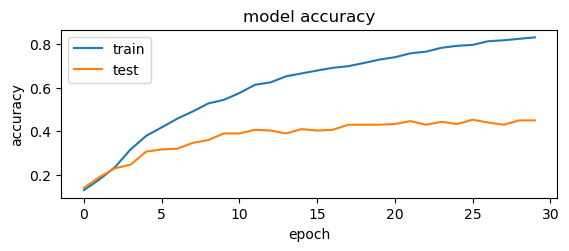

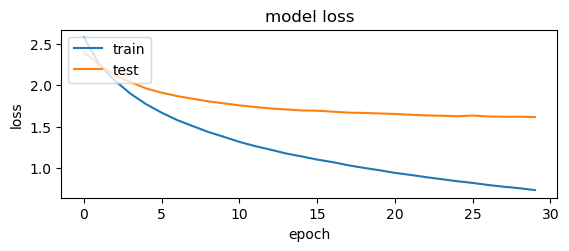

In [10]:
# Visualize Model Training History (Baseline Model)

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss (Baseline Model)

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# Define ResNet50 model with pre-trained weights (exclude top)
from tensorflow.keras.applications import ResNet50

resnet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# Freeze layers in base model
for layer in resnet50_base_model.layers:
    layer.trainable = False

In [12]:
# Add custom top layers for CIFAR-10 classification
x = resnet50_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create final model
model1 = Model(inputs=resnet50_base_model.input, outputs=predictions)
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 4, 4, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [13]:
# Compile model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history1 = model1.fit(X_train, y_train_ohe, epochs=30, validation_data=(X_valid, y_valid_ohe))

Epoch 1/30
29/29 [==============================] - 12s 210ms/step - loss: 2.5794 - accuracy: 0.1200 - val_loss: 2.5242 - val_accuracy: 0.1033
Epoch 2/30
29/29 [==============================] - 5s 165ms/step - loss: 2.4119 - accuracy: 0.1300 - val_loss: 2.2976 - val_accuracy: 0.1400
Epoch 3/30
29/29 [==============================] - 5s 170ms/step - loss: 2.2561 - accuracy: 0.1622 - val_loss: 2.2521 - val_accuracy: 0.1500
Epoch 4/30
29/29 [==============================] - 5s 157ms/step - loss: 2.2045 - accuracy: 0.1889 - val_loss: 2.2552 - val_accuracy: 0.1633
Epoch 5/30
29/29 [==============================] - 5s 177ms/step - loss: 2.1628 - accuracy: 0.2211 - val_loss: 2.2113 - val_accuracy: 0.2267
Epoch 6/30
29/29 [==============================] - 6s 197ms/step - loss: 2.2103 - accuracy: 0.1856 - val_loss: 2.1314 - val_accuracy: 0.2067
Epoch 7/30
29/29 [==============================] - 5s 159ms/step - loss: 2.1396 - accuracy: 0.2100 - val_loss: 2.2763 - val_accuracy: 0.1467
Epoch

In [15]:
# Evaluate the model
test_loss, test_acc = model1.evaluate(X_test, y_test_ohe)
print("Test Accuracy:", test_acc)

10/10 [==============================] - 1s 132ms/step - loss: 1.9984 - accuracy: 0.2600
Test Accuracy: 0.25999999046325684


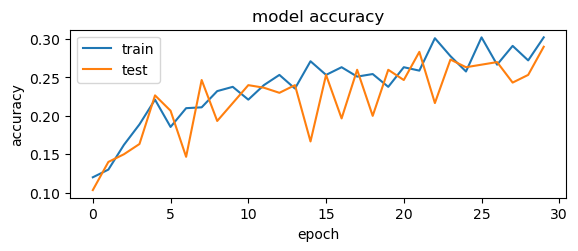

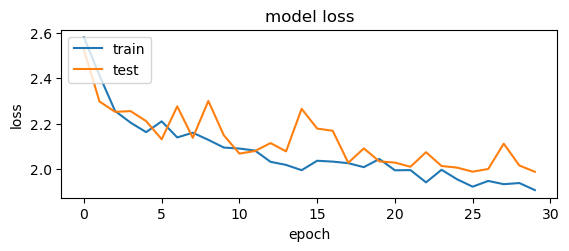

In [16]:
# Visualize Model Training History (Baseline Model)

plt.subplot(211)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss (Baseline Model)

plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 